In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from citipy import citipy
from config import weather_api_key

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [5]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name


    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count.
len(cities)

608

In [6]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | cape town
Processing Record 2 of Set 1 | egvekinot
Processing Record 3 of Set 1 | hede
Processing Record 4 of Set 1 | port alfred
Processing Record 5 of Set 1 | saint george
Processing Record 6 of Set 1 | utiroa
City not found. Skipping...
Processing Record 7 of Set 1 | bathsheba
Processing Record 8 of Set 1 | mar del plata
Processing Record 9 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 10 of Set 1 | sao paulo de olivenca
Processing Record 11 of Set 1 | kupang
Processing Record 12 of Set 1 | busselton
Processing Record 13 of Set 1 | longyearbyen
Processing Record 14 of Set 1 | bethel
Processing Record 15 of Set 1 | vao
Processing Record 16 of Set 1 | vila velha
Processing Record 17 of Set 1 | chuy
Processing Record 18 of Set 1 | tiksi
Processing Record 19 of Set 1 | elizabeth city
Processing Record 20 of Set 1 | kapaa
Processing Record 21 of Set 1 | rikitea
Processing Record

Processing Record 38 of Set 4 | champerico
Processing Record 39 of Set 4 | locri
Processing Record 40 of Set 4 | vaitupu
City not found. Skipping...
Processing Record 41 of Set 4 | kanadey
Processing Record 42 of Set 4 | portland
Processing Record 43 of Set 4 | camacha
Processing Record 44 of Set 4 | port pirie
Processing Record 45 of Set 4 | astana
Processing Record 46 of Set 4 | nikolskoye
Processing Record 47 of Set 4 | barda
Processing Record 48 of Set 4 | san quintin
Processing Record 49 of Set 4 | shingu
Processing Record 50 of Set 4 | itaqui
Processing Record 1 of Set 5 | fukuma
Processing Record 2 of Set 5 | am timan
Processing Record 3 of Set 5 | saint-philippe
Processing Record 4 of Set 5 | voi
Processing Record 5 of Set 5 | serebryanyy bor
Processing Record 6 of Set 5 | maniitsoq
Processing Record 7 of Set 5 | butaritari
Processing Record 8 of Set 5 | necochea
Processing Record 9 of Set 5 | mehamn
Processing Record 10 of Set 5 | tessalit
Processing Record 11 of Set 5 | petro

City not found. Skipping...
Processing Record 27 of Set 8 | jaffna
Processing Record 28 of Set 8 | bowen
Processing Record 29 of Set 8 | alofi
Processing Record 30 of Set 8 | andevoranto
City not found. Skipping...
Processing Record 31 of Set 8 | jarvenpaa
Processing Record 32 of Set 8 | nesna
Processing Record 33 of Set 8 | ust-bolsheretsk
City not found. Skipping...
Processing Record 34 of Set 8 | marshfield
Processing Record 35 of Set 8 | copiapo
Processing Record 36 of Set 8 | porbandar
Processing Record 37 of Set 8 | guerrero negro
Processing Record 38 of Set 8 | pueblo
Processing Record 39 of Set 8 | skalistyy
City not found. Skipping...
Processing Record 40 of Set 8 | touros
Processing Record 41 of Set 8 | pa sang
Processing Record 42 of Set 8 | butterworth
Processing Record 43 of Set 8 | navahrudak
Processing Record 44 of Set 8 | karamea
City not found. Skipping...
Processing Record 45 of Set 8 | shkotovo-26
City not found. Skipping...
Processing Record 46 of Set 8 | xinzhou
Pr

Processing Record 7 of Set 12 | diamantino
Processing Record 8 of Set 12 | mugla
Processing Record 9 of Set 12 | diego de almagro
Processing Record 10 of Set 12 | leninsk
Processing Record 11 of Set 12 | buraydah
Processing Record 12 of Set 12 | oyonnax
Processing Record 13 of Set 12 | vestmanna
Processing Record 14 of Set 12 | fortuna
Processing Record 15 of Set 12 | guantanamo
Processing Record 16 of Set 12 | joutseno
Processing Record 17 of Set 12 | sherlovaya gora
Processing Record 18 of Set 12 | moyale
Processing Record 19 of Set 12 | moose factory
Processing Record 20 of Set 12 | grand gaube
Processing Record 21 of Set 12 | atar
Processing Record 22 of Set 12 | lodja
Processing Record 23 of Set 12 | tidore
City not found. Skipping...
Processing Record 24 of Set 12 | ankang
Processing Record 25 of Set 12 | the pas
Processing Record 26 of Set 12 | rio claro
Processing Record 27 of Set 12 | imperia
Processing Record 28 of Set 12 | beisfjord
Processing Record 29 of Set 12 | wenling
P

In [7]:
# Print Data type
type(city_data)

list

In [8]:
#Print Data list
city_data

[{'City': 'Cape Town',
  'Lat': -33.9258,
  'Lng': 18.4232,
  'Max Temp': 58.12,
  'Humidity': 83,
  'Cloudiness': 75,
  'Wind Speed': 24.16,
  'Country': 'ZA',
  'Date': '2022-06-17 18:50:02'},
 {'City': 'Egvekinot',
  'Lat': 66.3167,
  'Lng': -179.1667,
  'Max Temp': 37.17,
  'Humidity': 90,
  'Cloudiness': 95,
  'Wind Speed': 5.08,
  'Country': 'RU',
  'Date': '2022-06-17 18:51:25'},
 {'City': 'Hede',
  'Lat': 33.7681,
  'Lng': 120.2517,
  'Max Temp': 78.6,
  'Humidity': 62,
  'Cloudiness': 0,
  'Wind Speed': 7.96,
  'Country': 'CN',
  'Date': '2022-06-17 18:51:25'},
 {'City': 'Port Alfred',
  'Lat': -33.5906,
  'Lng': 26.891,
  'Max Temp': 63.64,
  'Humidity': 41,
  'Cloudiness': 0,
  'Wind Speed': 11.32,
  'Country': 'ZA',
  'Date': '2022-06-17 18:51:25'},
 {'City': 'Saint George',
  'Lat': 37.1041,
  'Lng': -113.5841,
  'Max Temp': 100.63,
  'Humidity': 6,
  'Cloudiness': 0,
  'Wind Speed': 25.32,
  'Country': 'US',
  'Date': '2022-06-17 18:50:27'},
 {'City': 'Bathsheba',
  'Lat'

In [9]:
# Print length of dataset
print(len(city_data))

552


In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(5)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Cape Town,-33.9258,18.4232,58.12,83,75,24.16,ZA,2022-06-17 18:50:02
1,Egvekinot,66.3167,-179.1667,37.17,90,95,5.08,RU,2022-06-17 18:51:25
2,Hede,33.7681,120.2517,78.60,62,0,7.96,CN,2022-06-17 18:51:25
3,Port Alfred,-33.5906,26.8910,63.64,41,0,11.32,ZA,2022-06-17 18:51:25
4,Saint George,37.1041,-113.5841,100.63,6,0,25.32,US,2022-06-17 18:50:27


In [11]:
# Reset column order
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]

In [12]:
# Set new column order 
city_order_df = city_data_df[new_column_order]
city_order_df.head(5)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Cape Town,ZA,2022-06-17 18:50:02,-33.9258,18.4232,58.12,83,75,24.16
1,Egvekinot,RU,2022-06-17 18:51:25,66.3167,-179.1667,37.17,90,95,5.08
2,Hede,CN,2022-06-17 18:51:25,33.7681,120.2517,78.60,62,0,7.96
3,Port Alfred,ZA,2022-06-17 18:51:25,-33.5906,26.8910,63.64,41,0,11.32
4,Saint George,US,2022-06-17 18:50:27,37.1041,-113.5841,100.63,6,0,25.32


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

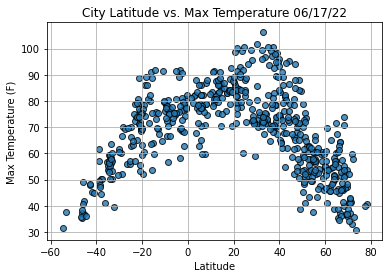

In [19]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/City_lat_vs_temp.png")

# Show plot.
plt.show()

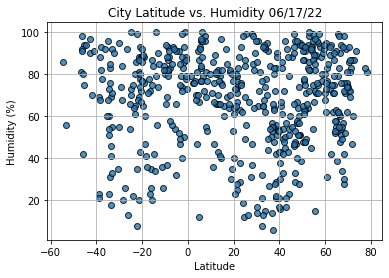

In [20]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/City_lat_vs_humidity.png")

# Show plot.
plt.show()

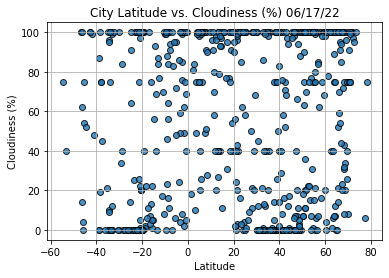

In [24]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/City_lat_vs_cloudiness.png")

# Show plot.
plt.show()

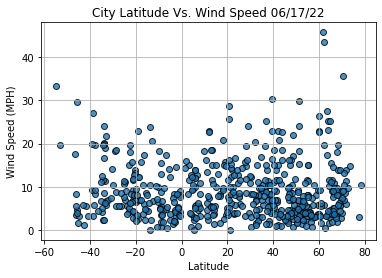

In [31]:
# Build scatter plot for city lat vs. wind speed
plt.scatter(lats,
            wind_speed,
            marker = "o",
            edgecolors = "black",
            alpha = .8)

# Create title, labels and grid 
plt.title("City Latitude Vs. Wind Speed " + time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")
plt.grid(True)

# Save figure
plt.savefig("weather_data/City_lat_vs_windspeed")